In [ ]:
!pip install -q rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 37.4 MB/s eta 0:00:00


In [ ]:
# Bibliotecas
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
from rasterio.plot import reshape_as_image, show
import geopandas as gpd

In [12]:
# Carregando arquivos
raster_path = '/content/drive/MyDrive/Curso PDI com Python/L71221071_07120010720_DN.tif'
raster = rio.open(raster_path)
points_path = '/content/pontos_DF.gpkg'
points_gdf = gpd.read_file(points_path)

<Axes: >

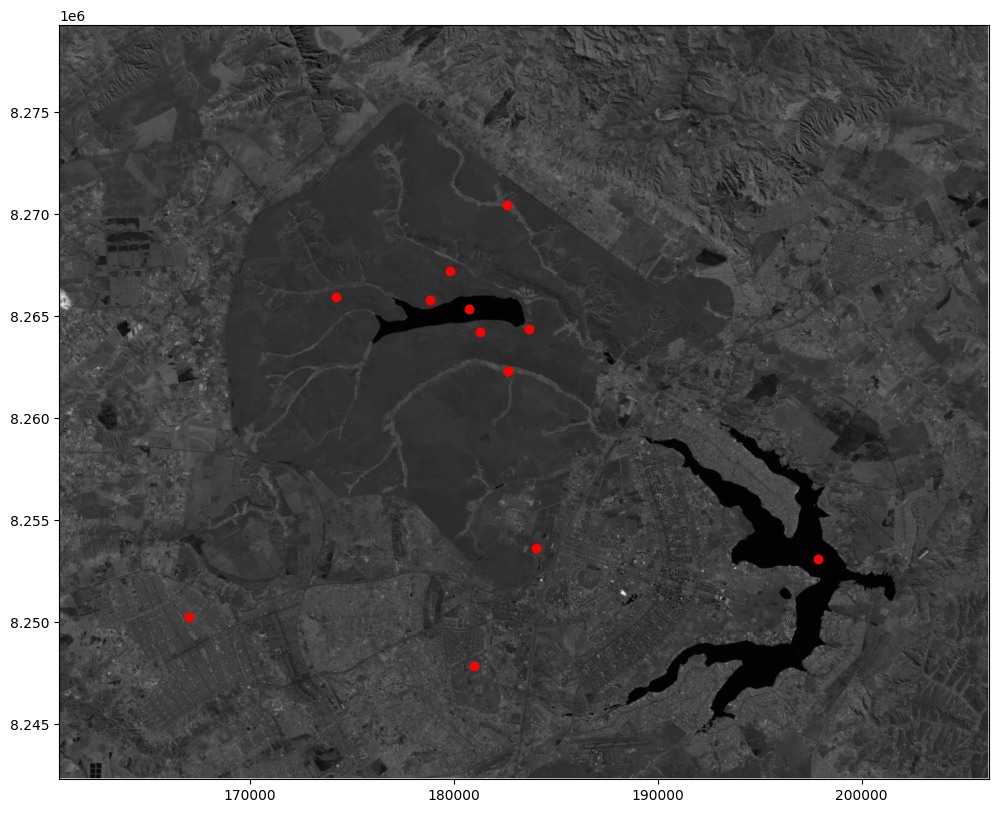

In [13]:
# Visualizando pontos
fig, ax = plt.subplots(figsize=(12,12))
points_gdf.plot(ax=ax, color='red')
show(raster.read(4), transform=raster.transform, cmap='gray', ax=ax)

In [14]:
# Definindo função de extração
def extract_raster_values_at_points(raster, points_gdf):
    band_values = [[] for _ in range(raster.count)]

    # Obter o índice de linha e coluna no raster
    for index, point in points_gdf.iterrows():
        x, y = point.geometry.x, point.geometry.y
        row, col = raster.index(x, y)

        for band in range(1, raster.count + 1):
            value = raster.read(band, window=((row, row+1), (col, col+1)))  # Ler o valor na localização dada
            band_values[band - 1].append(value[0, 0])  # Adicionar o valor à lista da banda correspondente

    return band_values

In [15]:
# Extrair valores do raster para cada ponto e banda
band_values = extract_raster_values_at_points(raster, points_gdf)

# Adicionar os valores extraídos como novas colunas ao GeoDataFrame
for i, values in enumerate(band_values):
    points_gdf[f'banda_{i+1}'] = values

In [17]:
points_gdf

,id,classe,geometry,banda_1,banda_2,banda_3,banda_4,banda_5,banda_6
0,1,agua,POINT (180750.697 8265320.746),51,35,25,14,10,10
1,1,agua,POINT (197839.488 8253087.283),50,36,22,14,9,9
2,2,urbano,POINT (167022.480 8250244.260),79,74,91,71,104,90
3,2,urbano,POINT (180995.648 8247848.015),72,67,81,76,101,81
4,3,mata,POINT (182662.994 8262303.376),49,37,28,69,41,23
5,3,mata,POINT (182622.689 8270452.398),49,39,30,94,44,20
6,4,cerrado,POINT (178858.219 8265770.435),53,41,41,61,69,38
7,4,cerrado,POINT (181293.837 8264236.933),54,42,40,59,73,45
8,5,campo,POINT (174233.151 8265909.558),60,46,54,62,102,63
9,5,campo,POINT (179835.705 8267212.004),58,46,54,61,102,62
